In [1]:
# Forecasting Sklearn

In [2]:
import yfinance as yf
nvidia = yf.Ticker("NVDA")
nvidia = nvidia.history(period="max")
nvidia

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-01-22 00:00:00-05:00,0.401320,0.447901,0.355932,0.376237,271468800,0.00,0.0
1999-01-25 00:00:00-05:00,0.406097,0.420430,0.376237,0.415653,51048000,0.00,0.0
1999-01-26 00:00:00-05:00,0.420430,0.428791,0.377431,0.383404,34320000,0.00,0.0
1999-01-27 00:00:00-05:00,0.384598,0.394154,0.363098,0.382210,24436800,0.00,0.0
1999-01-28 00:00:00-05:00,0.382210,0.384598,0.378626,0.381015,22752000,0.00,0.0
...,...,...,...,...,...,...,...
2024-03-01 00:00:00-05:00,799.962494,822.961416,794.312735,822.751404,47677700,0.00,0.0
2024-03-04 00:00:00-05:00,841.260529,876.908881,837.150736,852.330017,61561600,0.00,0.0
2024-03-05 00:00:00-05:00,852.700012,860.969971,834.169983,859.640015,52063900,0.04,0.0


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<Axes: xlabel='Date'>

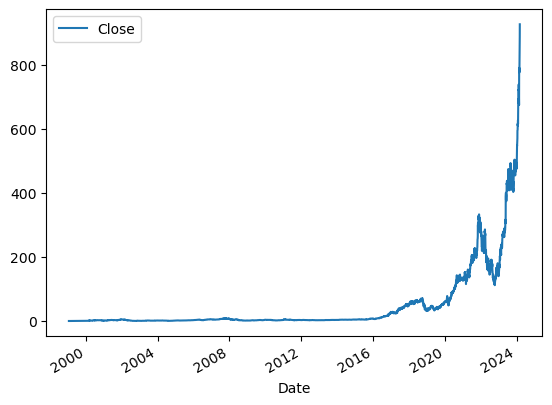

In [4]:
nvidia.plot.line(y='Close', use_index=True)

In [5]:
del nvidia['Dividends']
del nvidia["Stock Splits"]

In [7]:
nvidia['Tomorrow'] = nvidia['Close'].shift(-1)
nvidia

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1999-01-22 00:00:00-05:00,0.401320,0.447901,0.355932,0.376237,271468800,0.415653
1999-01-25 00:00:00-05:00,0.406097,0.420430,0.376237,0.415653,51048000,0.383404
1999-01-26 00:00:00-05:00,0.420430,0.428791,0.377431,0.383404,34320000,0.382210
1999-01-27 00:00:00-05:00,0.384598,0.394154,0.363098,0.382210,24436800,0.381015
1999-01-28 00:00:00-05:00,0.382210,0.384598,0.378626,0.381015,22752000,0.363098
...,...,...,...,...,...,...
2024-03-01 00:00:00-05:00,799.962494,822.961416,794.312735,822.751404,47677700,852.330017
2024-03-04 00:00:00-05:00,841.260529,876.908881,837.150736,852.330017,61561600,859.640015
2024-03-05 00:00:00-05:00,852.700012,860.969971,834.169983,859.640015,52063900,887.000000


In [9]:
nvidia['Target'] = (nvidia["Tomorrow"] > nvidia['Close']).astype(int)
nvidia

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1999-01-22 00:00:00-05:00,0.401320,0.447901,0.355932,0.376237,271468800,0.415653,1
1999-01-25 00:00:00-05:00,0.406097,0.420430,0.376237,0.415653,51048000,0.383404,0
1999-01-26 00:00:00-05:00,0.420430,0.428791,0.377431,0.383404,34320000,0.382210,0
1999-01-27 00:00:00-05:00,0.384598,0.394154,0.363098,0.382210,24436800,0.381015,0
1999-01-28 00:00:00-05:00,0.382210,0.384598,0.378626,0.381015,22752000,0.363098,0
...,...,...,...,...,...,...,...
2024-03-01 00:00:00-05:00,799.962494,822.961416,794.312735,822.751404,47677700,852.330017,1
2024-03-04 00:00:00-05:00,841.260529,876.908881,837.150736,852.330017,61561600,859.640015,1
2024-03-05 00:00:00-05:00,852.700012,860.969971,834.169983,859.640015,52063900,887.000000,1


In [11]:
nvidia = nvidia.loc["1999-02-01":].copy()
nvidia

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1999-02-01 00:00:00-05:00,0.363098,0.372654,0.363098,0.370265,15470400,0.341600,0
1999-02-02 00:00:00-05:00,0.363098,0.372654,0.330850,0.341600,26409600,0.348766,1
1999-02-03 00:00:00-05:00,0.336822,0.353544,0.334433,0.348766,7512000,0.367877,1
1999-02-04 00:00:00-05:00,0.353544,0.377431,0.348766,0.367877,18192000,0.378626,1
1999-02-05 00:00:00-05:00,0.373848,0.382209,0.364293,0.378626,13684800,0.365488,0
...,...,...,...,...,...,...,...
2024-03-01 00:00:00-05:00,799.962494,822.961416,794.312735,822.751404,47677700,852.330017,1
2024-03-04 00:00:00-05:00,841.260529,876.908881,837.150736,852.330017,61561600,859.640015,1
2024-03-05 00:00:00-05:00,852.700012,860.969971,834.169983,859.640015,52063900,887.000000,1


In [12]:
from sklearn.ensemble import RandomForestClassifier

model =RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train = nvidia.iloc[:-100]
test = nvidia.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [13]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [14]:
preds = pd.Series(preds, index=test.index)

In [15]:
precision_score(test["Target"], preds)

0.42857142857142855

<Axes: xlabel='Date'>

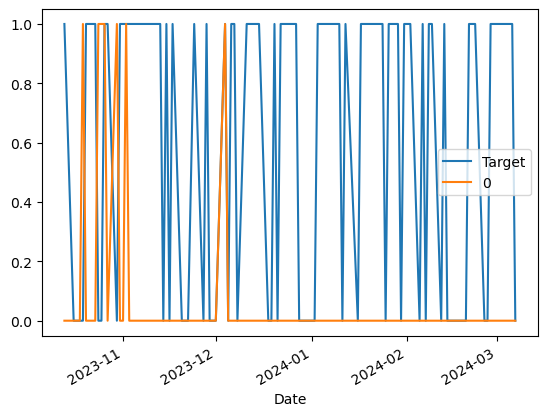

In [16]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [17]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [24]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [25]:
predictions = backtest(nvidia, model, predictors)

In [26]:
predictions['Predictions'].value_counts()

Predictions
0    2180
1    1636
Name: count, dtype: int64

In [28]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5281173594132029

In [29]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.529612
0    0.470388
Name: count, dtype: float64

In [35]:
horizons = [2,5,60,250,1000]

new_predictors = []

for horizon in horizons:
    rolling_averages = nvidia.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    nvidia[ratio_column] = nvidia["Close"]/rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    nvidia[trend_column] = nvidia.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [37]:
nvidia

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1999-02-01 00:00:00-05:00,0.363098,0.372654,0.363098,0.370265,15470400,0.341600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-02 00:00:00-05:00,0.363098,0.372654,0.330850,0.341600,26409600,0.348766,1,0.959732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-03 00:00:00-05:00,0.336822,0.353544,0.334433,0.348766,7512000,0.367877,1,1.010380,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-04 00:00:00-05:00,0.353544,0.377431,0.348766,0.367877,18192000,0.378626,1,1.026668,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-05 00:00:00-05:00,0.373848,0.382209,0.364293,0.378626,13684800,0.365488,0,1.014399,2.0,1.047586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01 00:00:00-05:00,799.962494,822.961416,794.312735,822.751404,47677700,852.330017,1,1.019623,2.0,1.036659,3.0,1.377490,39.0,1.866306,142.0,3.485111,546.0
2024-03-04 00:00:00-05:00,841.260529,876.908881,837.150736,852.330017,61561600,859.640015,1,1.017658,2.0,1.057552,3.0,1.411779,39.0,1.922639,143.0,3.598234,547.0
2024-03-05 00:00:00-05:00,852.700012,860.969971,834.169983,859.640015,52063900,887.000000,1,1.004270,2.0,1.047729,4.0,1.408157,40.0,1.928223,144.0,3.616884,547.0


In [38]:
nvidia = nvidia.dropna()
nvidia

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2003-01-24 00:00:00-05:00,0.817163,0.820985,0.763654,0.777413,89710800,0.765947,0,0.970883,1.0,0.965445,2.0,0.770153,29.0,0.405248,103.0,0.402582,470.0
2003-01-27 00:00:00-05:00,0.760597,0.800346,0.746837,0.765947,88911600,0.793467,1,0.992571,0.0,0.964575,2.0,0.759417,29.0,0.402779,103.0,0.396557,470.0
2003-01-28 00:00:00-05:00,0.756010,0.807990,0.730784,0.793467,178548000,0.809519,1,1.017647,1.0,1.001158,3.0,0.787557,29.0,0.420977,103.0,0.410710,470.0
2003-01-29 00:00:00-05:00,0.772063,0.815635,0.772063,0.809519,102204000,0.776649,0,1.010014,2.0,1.019446,3.0,0.804824,29.0,0.433371,103.0,0.418923,470.0
2003-01-30 00:00:00-05:00,0.825572,0.832452,0.768241,0.776649,74306400,0.788880,1,0.979277,1.0,0.989868,2.0,0.776017,28.0,0.419481,103.0,0.401830,469.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29 00:00:00-05:00,790.902902,799.862503,783.463248,791.082886,50728900,822.751404,1,1.009243,1.0,1.005529,3.0,1.338200,38.0,1.804029,142.0,3.361807,545.0
2024-03-01 00:00:00-05:00,799.962494,822.961416,794.312735,822.751404,47677700,852.330017,1,1.019623,2.0,1.036659,3.0,1.377490,39.0,1.866306,142.0,3.485111,546.0
2024-03-04 00:00:00-05:00,841.260529,876.908881,837.150736,852.330017,61561600,859.640015,1,1.017658,2.0,1.057552,3.0,1.411779,39.0,1.922639,143.0,3.598234,547.0


In [39]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [40]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:, 1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [41]:
predictions = backtest(nvidia, model, new_predictors)

In [42]:
predictions["Predictions"].value_counts()

Predictions
0.0    2581
1.0     234
Name: count, dtype: int64

In [47]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5811965811965812